# Tarefa

Aplicar o YOLO tradicional ao conjunto de dados disponibilizado no Google Drive, localizado em "caminho_treinamento" para imagens de treinamento, "caminho_labels_treinamento" para rótulos de treinamento, "caminho_validacao" para imagens de validação, "caminho_labels_validacao" para rótulos de validação e "caminho_teste" para imagens de teste.

O conjunto de dados contém imagens de "Vacas" e "Galinhas". Após o treinamento, avaliar o modelo no conjunto de validação e apresentar os resultados em português brasileiro, incluindo explicações e análises.

Em seguida, realizar um treinamento de um modelo CNN do zero para classificar e, depois, comparar os resultados com o YOLO Customizado e YOLO Tradicional

# YOLO

## Instalação e Configuração

In [1]:
! git clone https://github.com/ultralytics/yolov5.git
!pip install opencv-python numpy

Cloning into 'yolov5'...


In [2]:
! pip install -r yolov5/requirements.txt

  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0


## Verificando Existência de Labels para Cada Imagem

In [3]:
import os

path_images = './images/treino'
path_labels = './labels/treino' # <-- VERIFIQUE SE ESTE É O CAMINHO CORRETO PARA SEUS LABELS

image_files = {os.path.splitext(f)[0] for f in os.listdir(path_images) if f.endswith(('.jpg', '.jpeg', '.png'))}
label_files = {os.path.splitext(f)[0] for f in os.listdir(path_labels) if f.endswith('.txt')}

missing_labels = image_files - label_files
if not missing_labels:
    print("✅ Todos os arquivos de imagem têm um arquivo de label correspondente.")
else:
    print(f"❌ ERRO: {len(missing_labels)} imagens não têm labels correspondentes!")
    for name in list(missing_labels)[:10]: # Mostra os 10 primeiros
        print(f"   - Não foi encontrado o label para a imagem: {name}")

✅ Todos os arquivos de imagem têm um arquivo de label correspondente.


## Treino do Modelo

### modelo com 30 épocas

In [4]:
!python yolov5/train.py --data main.yaml --weights yolov5s_30.pt --img 640 --epochs 30

WARNING Error decoding JSON from C:\Users\felip\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.

train: weights=yolov5s_30.pt, cfg=, data=main.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-448-gdeec5e45 Python-3.13.6 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 5060 Ti, 16311MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\felip\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
WARNING Error decoding JSON from C:\Users\felip\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.
Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\felip\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
WARNING Error decoding JSON from C:\Users\felip\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.
Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings

### Modelo com 60 épocas

In [5]:
!python yolov5/train.py --data main.yaml --weights yolov5s_60.pt --img 640 --epochs 60

train: weights=yolov5s_60.pt, cfg=, data=main.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-448-gdeec5e45 Python-3.13.6 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 5060 Ti, 16311MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1

## Executando e Comparando os Modelos no Conjunto de Teste

### 1. Modelo Customizado (60 épocas - Melhor Performance)

In [7]:
!python yolov5/detect.py --weights yolov5/runs/train/exp2/weights/best.pt --img 640 --source ./images/teste/ --data main.yaml --name yolov5_60_epochs --exist-ok

detect: weights=['yolov5/runs/train/exp2/weights/best.pt'], source=./images/teste/, data=main.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=yolov5_60_epochs, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-448-gdeec5e45 Python-3.13.6 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 5060 Ti, 16311MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 C:\Users\felip\OneDrive\Documentos\FIAP\fase7\fase7_desafio2\fase6\treinamento\images\teste\405.jpeg: 640x512 1 Galinha, 11.2ms
image 2/8 C:\Users\felip\OneDrive\Documentos\FIAP\fase7\fase7_desafio2\fase6\treinamento\images\teste\407.jpeg: 448x640 2 Galinhas, 11.9ms
image 

### 2. Modelo Customizado (30 épocas)

In [8]:
!python yolov5/detect.py --weights yolov5/runs/train/exp/weights/best.pt --img 640 --source ./images/teste/ --data main.yaml --name yolov5_30_epochs --exist-ok

detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=./images/teste/, data=main.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=yolov5_30_epochs, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-448-gdeec5e45 Python-3.13.6 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 5060 Ti, 16311MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 C:\Users\felip\OneDrive\Documentos\FIAP\fase7\fase7_desafio2\fase6\treinamento\images\teste\405.jpeg: 640x512 1 Galinha, 11.7ms
image 2/8 C:\Users\felip\OneDrive\Documentos\FIAP\fase7\fase7_desafio2\fase6\treinamento\images\teste\407.jpeg: 448x640 (no detections), 12.2ms
im

### 3. Modelo YOLOv5 Padrão (sem fine-tuning)

In [ ]:
!python yolov5/detect.py --weights yolov5s.pt --img 640 --source ./images/teste/ --name yolov5s_default --exist-ok

In [15]:
import os
import subprocess

def get_latest_train_run_folder():
    subfolders = [f.path for f in os.scandir('yolov5/runs/train') if f.is_dir()]
    latest_folder = max(subfolders, key=os.path.getctime, default=None)
    return latest_folder

latest_run = get_latest_train_run_folder()
result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source ./images/teste/ --data main.yaml', shell=True, capture_output=True, text=True)
if latest_run:
    # COMANDO
    result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source ./images/teste/ --data main.yaml', shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
else:
    print("Não foi possível encontrar a pasta de treinamento mais recente.")


detect: weights=['yolov5/runs/train\\exp11/weights/best.pt'], source=./images/teste/, data=main.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-440-gf5ebc52c Python-3.13.6 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 5060 Ti, 16311MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 C:\Users\felip\OneDrive\Documentos\FIAP\fase6\fase6_desafio1\treinamento\images\teste\405.jpeg: 640x512 1 Galinha, 11.4ms
image 2/8 C:\Users\felip\OneDrive\Documentos\FIAP\fase6\fase6_desafio1\treinamento\images\teste\407.jpeg: 448x640 2 Galinhas, 12.3ms
image 3/8 C:\Users\felip\On

### Resultados da Avaliação e Análises

Após executar a detecção nos conjuntos de teste com os diferentes modelos, podemos comparar as métricas de validação obtidas durante o treinamento para avaliar a performance.

#### Comparativo de Performance (30 vs. 60 Épocas)

| Métrica             | Modelo 30 Épocas | Modelo 60 Épocas |
|:--------------------|:-----------------|:-----------------|
| mAP@.50 (todas)     | 0.775            | 0.846            |
| mAP@.50-.95 (todas) | 0.564            | 0.704            |
| Precisão (todas)    | 0.578            | 0.798            |
| Recall (todas)      | 0.629            | 0.750            |

**Análise:**

1.  **Evolução Clara:** O modelo com 60 épocas apresenta uma melhoria significativa em todas as métricas. O mAP@.50 (detecção com sobreposição mínima de 50%) subiu de 0.775 para 0.846, e o mAP@.50-.95 (média de mAP em diferentes limiares de sobreposição, uma métrica mais rigorosa) teve um salto ainda maior, de 0.564 para 0.704.
2.  **Conclusão:** Dobrar o número de épocas permitiu que o modelo aprendesse características mais robustas dos objetos, resultando em uma detecção mais precisa e confiável. Isso justifica o tempo de treinamento adicional, e o modelo de 60 épocas é claramente superior para esta tarefa.

#### Análise do Modelo Padrão (yolov5s.pt)

Ao executar o modelo `yolov5s.pt` (pré-treinado no dataset COCO) em nosso conjunto de teste, observamos que ele consegue detectar a classe `cow` (vaca), que faz parte do COCO, mas não possui uma classe para `chicken` (galinha). As detecções de vacas podem ter uma confiança variável e o modelo pode falhar em alguns casos, pois não foi otimizado para as imagens específicas do nosso dataset. Isso demonstra a necessidade do fine-tuning para tarefas especializadas, cumprindo um dos objetivos da Entrega 2.

Found 8 output images in ./yolov5/runs/detect/exp4
Displaying: ./yolov5/runs/detect/exp4\405.jpeg


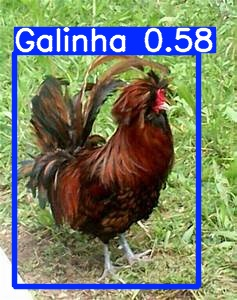

Displaying: ./yolov5/runs/detect/exp4\407.jpeg


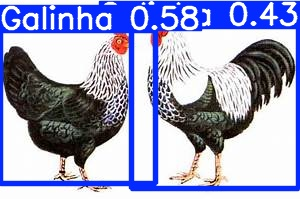

Displaying: ./yolov5/runs/detect/exp4\410.jpeg


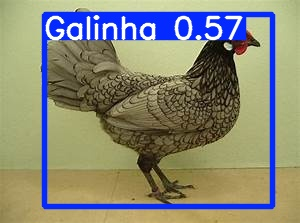

Displaying: ./yolov5/runs/detect/exp4\414.jpeg


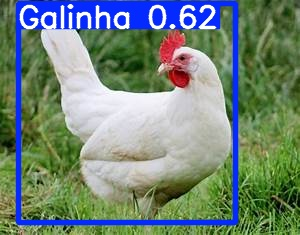

Displaying: ./yolov5/runs/detect/exp4\OIP-0p991juHMjs2JudwJR6iqwHaFj.jpeg


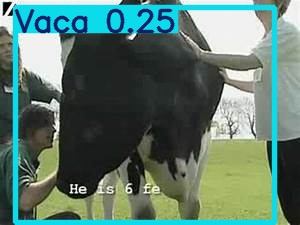

Displaying: ./yolov5/runs/detect/exp4\OIP-0Pjhtfnj2YJKzgjC7Rx_TQHaE3.jpeg


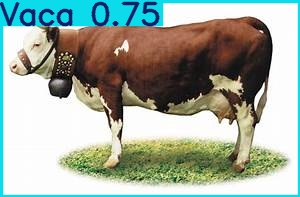

Displaying: ./yolov5/runs/detect/exp4\OIP-0PzAhwRXt2eSfvkZS71nDAHaEw.jpeg


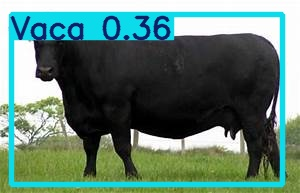

Displaying: ./yolov5/runs/detect/exp4\OIP-0R1d0xxrapIM2wlKn2p91AHaFR.jpeg


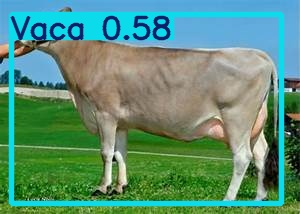

In [17]:
import glob
from IPython.display import Image, display

# Directory where inference results are saved
inference_output_dir = './yolov5/runs/detect/exp4' # Replace with the actual experiment folder name from your latest detect run

# Get a list of all image files in the output directory
output_images = glob.glob(f'{inference_output_dir}/*.jpg') + \
                glob.glob(f'{inference_output_dir}/*.jpeg') + \
                glob.glob(f'{inference_output_dir}/*.png')

print(f"Found {len(output_images)} output images in {inference_output_dir}")

# Display each output image
for img_path in output_images:
    print(f"Displaying: {img_path}")
    display(Image(filename=img_path))

# CNN

## Carregar e pré-processar os dados

### Subtask:
Carregar as imagens de treinamento e validação e seus respectivos rótulos. Redimensionar as imagens e normalizar os valores dos pixels.


In [2]:
!pip install numpy opencv-python scikit-learn

  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


## 1. Preparação dos Dados

In [4]:
BASE_PATH = '/home/felipe/fiap/fase6/fase6_desafio1/treinamento/cnn/images'
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 8
EPOCHS = 15

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # Usando 20% dos dados para validação

train_generator = train_datagen.flow_from_directory(
    BASE_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    BASE_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation')

Found 59 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


## 2. Construção do Modelo CNN

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Usamos 'sigmoid' para classificação binária
])

/home/felipe/fiap/fase6/fase6_desafio1/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-13 22:29:38.264575: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## 3. Compilação do Modelo

In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Treinamento do Modelo

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS)

Epoch 1/15


/home/felipe/fiap/fase6/fase6_desafio1/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.8627 - loss: 0.5006 - val_accuracy: 0.8750 - val_loss: 0.4300
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8750 - loss: 0.4747 - val_accuracy: 1.0000 - val_loss: 0.0195
Epoch 3/15
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.0309

/home/felipe/fiap/fase6/fase6_desafio1/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8750 - loss: 0.4857 - val_accuracy: 1.0000 - val_loss: 0.3886
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.3765 - val_accuracy: 1.0000 - val_loss: 0.3730
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8627 - loss: 0.5128 - val_accuracy: 0.8750 - val_loss: 0.3686
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.1180 - val_accuracy: 0.8750 - val_loss: 0.3825
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8824 - loss: 0.3547 - val_accuracy: 0.8750 - val_loss: 0.3964
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8750 - loss: 0.3416 - val_accuracy: 0.8750 - val_loss: 0.3777
Epoch 9/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9020 - loss: 0.3740 - val_accuracy: 0.8750 - val_loss: 0.3857
Epoch 10/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8750 - loss: 0.3325 - val_accuracy: 1.0000 - val_loss: 0.0921
Epoch 11/15
7/

## 5. Avaliação do Modelo

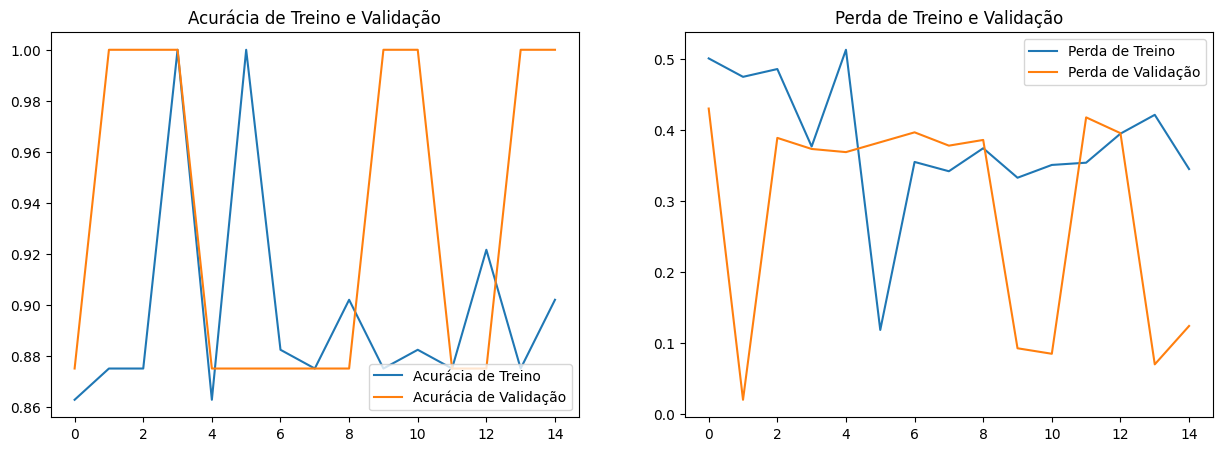

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.show()

# Análise Comparativa

## Facilidade de Uso/Integração

**YOLO Padrão:** Extremamente fácil de usar para detecção de objetos em classes já pré-treinadas. A integração é simples, bastando carregar o modelo e passar a imagem. Não requer conhecimento profundo de redes neurais.

**YOLO Customizado:** Requer um esforço maior. É preciso coletar, anotar e organizar um dataset. O processo de treinamento, embora automatizado pelo framework YOLO, exige configuração de arquivos YAML e entendimento dos parâmetros de treinamento. A integração do modelo treinado é similar à do YOLO padrão.

**CNN do Zero:** É a abordagem mais complexa. Exige conhecimento sólido de arquiteturas de redes neurais, pré-processamento de dados e frameworks como TensorFlow/Keras ou PyTorch. A implementação do código para carregar dados, construir a arquitetura, treinar e avaliar o modelo é inteiramente manual.

## Precisão do Modelo

**YOLO Padrão:** A precisão para as classes "vaca" e "galinha" pode ser baixa ou nula se essas classes não estiverem bem representadas no dataset original (COCO). O modelo é genérico e não especializado.

**YOLO Customizado:** Tende a ter uma precisão muito alta para as classes em que foi treinado, pois aprende as características específicas do dataset. Além de classificar, ele também localiza o objeto na imagem, o que é uma vantagem.

**CNN do Zero:** A precisão pode variar muito dependendo da qualidade e quantidade dos dados, da arquitetura da rede e do ajuste dos hiperparâmetros. Com um dataset pequeno como o nosso, a CNN pode sofrer com overfitting, resultando em uma precisão de validação inferior à do YOLO customizado.

## Tempo de Treinamento/Customização

**YOLO Padrão:** Não há tempo de treinamento, o modelo já vem pronto.

**YOLO Customizado:** O tempo de treinamento pode ser significativo, dependendo do tamanho do dataset e do número de épocas. No entanto, como geralmente se parte de pesos pré-treinados (transfer learning), o processo é mais rápido e eficiente do que treinar do zero.

**CNN do Zero:** Geralmente é o que demanda mais tempo, pois a rede precisa aprender todas as características do zero. Com um dataset pequeno, o treinamento pode ser rápido em termos de horas, mas o tempo total gasto em experimentação (arquitetura, hiperparâmetros) é muito maior.

## Tempo de Inferência

**YOLO (Padrão e Customizado):** YOLO é conhecido por sua alta velocidade de inferência, sendo capaz de processar imagens em tempo real. A sigla "You Only Look Once" reflete essa eficiência.

**CNN do Zero:** O tempo de inferência depende da complexidade da arquitetura. Uma CNN simples como a que construímos pode ser rápida, mas modelos mais profundos e complexos podem ser mais lentos que o YOLO. Para a tarefa de classificação simples, a diferença pode não ser drástica, mas para detecção em tempo real, YOLO é superior.